In [1]:
import pandas as pd
import numpy as np
from fredapi import Fred
fred = Fred(api_key="7a9c02dcad776de16efb3eef1a2b293d")
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
%matplotlib inline

## API
Imported from Fred: 
1. Economic Uncertainty Index fo the United States from 1985 
2. CBOE NASDAQ 100 Volatility Index from 2001

In [2]:
US_EconU = fred.get_series("USEPUINDXD")
NASDAQ_V = fred.get_series("VXNCLS")


I then combined both data sets into a single dataframe and changed the name of the columns. I dropped data from the uncertainty index that occured before February 2, 2001 as there was not any data from the volatility index at that time to compare it to. 

In [3]:
US_Un = pd.DataFrame(US_EconU)
NASDAQ = pd.DataFrame(NASDAQ_V)
US_NASDAQ = US_Un.merge(NASDAQ, how='right', left_index = True, right_index = True)
US_NASDAQ.columns = ['Uncertainty Index', 'NASDAQ Volatility Index']
print(US_NASDAQ)

            Uncertainty Index  NASDAQ Volatility Index
2001-02-02             127.88                    54.89
2001-02-05             102.29                    55.85
2001-02-06             126.76                    53.68
2001-02-07             144.08                    54.41
2001-02-08             111.14                    54.66
2001-02-09             245.50                    55.85
2001-02-12              46.81                    57.05
2001-02-13             158.71                    58.42
2001-02-14             168.89                    57.49
2001-02-15              74.80                    55.19
2001-02-16              96.07                    55.34
2001-02-19              72.40                      NaN
2001-02-20             128.51                    57.93
2001-02-21              85.93                    59.57
2001-02-22              95.31                    60.99
2001-02-23             171.87                    62.03
2001-02-26              71.28                    61.77
2001-02-27

In [4]:
US_NASDAQ.isnull()

,Uncertainty Index,NASDAQ Volatility Index
2001-02-02,False,False
2001-02-05,False,False
2001-02-06,False,False
2001-02-07,False,False
2001-02-08,False,False
2001-02-09,False,False
2001-02-12,False,False
2001-02-13,False,False
2001-02-14,False,False
2001-02-15,False,False


In [5]:
US_NASDAQ.isnull().sum()

Uncertainty Index            0
NASDAQ Volatility Index    161
dtype: int64

In [6]:
US_NASDAQ.dropna()

,Uncertainty Index,NASDAQ Volatility Index
2001-02-02,127.88,54.89
2001-02-05,102.29,55.85
2001-02-06,126.76,53.68
2001-02-07,144.08,54.41
2001-02-08,111.14,54.66
2001-02-09,245.50,55.85
2001-02-12,46.81,57.05
2001-02-13,158.71,58.42
2001-02-14,168.89,57.49
2001-02-15,74.80,55.19


I then looked to see if there were any outliers in hte data by taking a look at the box plots. 
    1. Uncertainty
        By looking at bbox1 and the descriptive data we calculated in the Descriptive Statistics section we can see that there are likely some outliers in the data.
    2. Volatility 
       In bbox2 and the descriptive statistics, we can again see that outliers are likely present in the data (as the std is 12 and the mean is 24 but the max value is 80).
       
For both of these I decided to keep the outliers in the data. My reasoning for this is that the data is collected by the Federal Reserve and is pretty generally used economic information. For this reason, I doubt that any of these outliers are the result of a mistake. Additionally, I believe that the outliers are an important part of our data, showing times when volatility or uncertainty were extremely high or low. This will aid in future analysis in testing perhaps if there is any correlation between times of great uncertainty and great volatility in NASDAQ. I do not believe that there is enough reason at this time to exclude the outliers, so for that reason I will keep them in the data. 

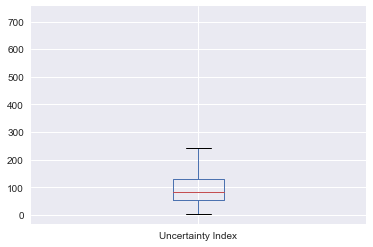

In [7]:
bbox1 = US_NASDAQ['Uncertainty Index'].plot(kind="box")

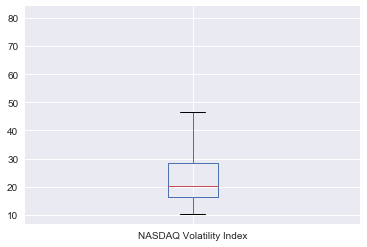

In [8]:
bbox2 = US_NASDAQ['NASDAQ Volatility Index'].plot(kind="box")

### Descriptive Statistics

In [9]:
US_NASDAQ.describe()

,Uncertainty Index,NASDAQ Volatility Index
count,4433.000000,4272.000000
mean,101.649709,24.854677
std,68.987965,12.389106
min,3.320000,10.310000
25%,55.050000,16.310000
50%,84.060000,20.185000
75%,129.910000,28.380000
max,719.070000,80.640000


In [10]:
US_NASDAQ.corr()

,Uncertainty Index,NASDAQ Volatility Index
Uncertainty Index,1.000000,0.352744
NASDAQ Volatility Index,0.352744,1.000000


In [11]:
US_NASDAQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4433 entries, 2001-02-02 to 2018-01-29
Data columns (total 2 columns):
Uncertainty Index          4433 non-null float64
NASDAQ Volatility Index    4272 non-null float64
dtypes: float64(2)
memory usage: 263.9 KB


### Data Visualization
    First I created a scatter plot of the Uncertainty Index compared to the NASDAQ Volatility Index. There seems to be a positive correlation between the two illustrated by the solid line. Suggesting that a greater Uncertainty Index is correlated to a greater Volatility Index.
    I think it's important to note,t that the volatility index and the uncertainty index are both on different scales which is why their values are so diffferent. 

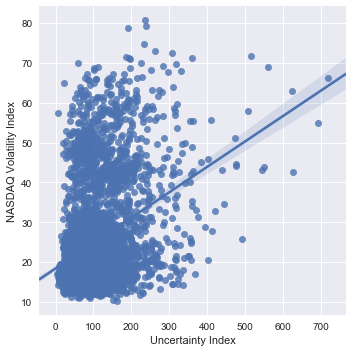

In [12]:
sns.lmplot(x="Uncertainty Index", y="NASDAQ Volatility Index", data=US_NASDAQ)

We can also see this in the line graph below. Blue is the Uncertainty Index and green is the Volatility Index. During large spikes in the volatility index, it seems that the uncertainty index is also experiencing a spike. 

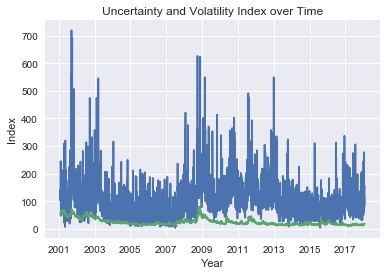

In [13]:
plt.plot(US_NASDAQ)
plt.ylabel('Index')
plt.xlabel('Year')
plt.title('Uncertainty and Volatility Index over Time')

## CSV
I'm using a CSV file for UFO sightings I got from www.kaggle.com. 

The first thing I did was look for missing values in the data. There are many in state, country, and shape. After lookingg at thed data, many of the nulls in state are when they occured in a different country outside of the United States. Many of the nulls in country and due to sightings on a military base, and many of the nulls in shape are because the shape was simply not provided in the description of the UFO. These instances of missing data take up a relatively small portion of the over 80,000 sightings and because they are not entirely random, I think it would be innapropriate to drop those observations. To fix the issue of the 12% of missing data from country, I will only be looking at data that has occured in the United States and Canada.

In [14]:
U=pd.read_csv("C:\Stuff\AFO_Sightings.csv", low_memory=False)
UFO = pd.DataFrame(U)

In [15]:
print(UFO)

               datetime      month  day  year  \
0      10/10/1949 20:30    October   10  1949   
1      10/10/1949 21:00    October   10  1949   
2      10/10/1955 17:00    October   10  1955   
3      10/10/1956 21:00    October   10  1956   
4      10/10/1960 20:00    October   10  1960   
5      10/10/1961 19:00    October   10  1961   
6      10/10/1965 21:00    October   10  1965   
7      10/10/1965 23:45    October   10  1965   
8      10/10/1966 20:00    October   10  1966   
9      10/10/1966 21:00    October   10  1966   
10     10/10/1968 13:00    October   10  1968   
11     10/10/1968 19:00    October   10  1968   
12     10/10/1970 16:00    October   10  1970   
13     10/10/1970 19:00    October   10  1970   
14     10/10/1971 21:00    October   10  1971   
15     10/10/1972 19:00    October   10  1972   
16     10/10/1972 22:30    October   10  1972   
17     10/10/1973 19:00    October   10  1973   
18     10/10/1973 23:00    October   10  1973   
19     10/10/1974 19

In [16]:
UFO.isnull().sum()

datetime                   0
month                      0
day                        0
year                       0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [17]:
UFO.count()

datetime                80332
month                   80332
day                     80332
year                    80332
city                    80332
state                   74535
country                 70662
shape                   78400
duration (seconds)      80332
duration (hours/min)    80332
comments                80317
date posted             80332
latitude                80332
longitude               80332
dtype: int64

In [18]:
del UFO['country']
UFO.dropna(subset=['state'])

,datetime,month,day,year,city,state,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,October,10,1949,san marcos,tx,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,October,10,1949,lackland afb,tx,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
3,10/10/1956 21:00,October,10,1956,edna,tx,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,October,10,1960,kaneohe,hi,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,October,10,1961,bristol,tn,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,10/10/1965 23:45,October,10,1965,norwalk,ct,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333
8,10/10/1966 20:00,October,10,1966,pell city,al,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,October,10,1966,live oak,fl,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167
10,10/10/1968 13:00,October,10,1968,hawthorne,ca,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667
11,10/10/1968 19:00,October,10,1968,brevard,nc,fireball,180.0,3 minutes,silent red /orange mass of energy floated by t...,6/12/2008,35.2333333,-82.734444


In terms with dealing with outliers for the data cleainging, I elected the keep them in. After looking at the data, much of it seems to be outliers and I cannot justify removing a large portion of it.

### Descriptive Statistics

In [19]:
pd.to_numeric(UFO['duration (seconds)'])

0         2700.0
1         7200.0
2           20.0
3           20.0
4          900.0
5          300.0
6          180.0
7         1200.0
8          180.0
9          120.0
10         300.0
11         180.0
12        1800.0
13         180.0
14          30.0
15        1200.0
16         120.0
17        1800.0
18          20.0
19        2700.0
20        1200.0
21        1200.0
22         360.0
23          60.0
24           3.0
25          30.0
26          30.0
27         300.0
28         900.0
29         270.0
          ...   
80302    10800.0
80303      600.0
80304      120.0
80305      900.0
80306       10.0
80307      600.0
80308     1290.0
80309       60.0
80310      300.0
80311      900.0
80312        5.0
80313        1.0
80314      180.0
80315      120.0
80316        4.0
80317        8.0
80318       90.0
80319     3600.0
80320       60.0
80321        3.0
80322       15.0
80323       60.0
80324      120.0
80325      180.0
80326       20.0
80327      600.0
80328     1200.0
80329     1200

I changed the value of the time in seconds that subjects saw a UFO to numeric values. The following are the descriptive statistics on how long people saw UFOs with a very large spread between the maximum and the minimum.

In [20]:
UFO["duration (seconds)"].describe()

count    8.033200e+04
mean     9.016889e+03
std      6.202168e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration (seconds), dtype: float64

From the following tabl we see that the earliest included sighting of a UFO is 1906 and the most recent being 2014 with most falling within the 2000s.

In [21]:
UFO.describe()

,day,year,duration (seconds),longitude
count,80332.000000,80332.000000,8.033200e+04,80332.000000
mean,14.994025,2003.850110,9.016889e+03,-86.772885
std,8.902090,10.426848,6.202168e+05,39.697205
min,1.000000,1906.000000,1.000000e-03,-176.658056
25%,7.000000,2001.000000,3.000000e+01,-112.073333
50%,15.000000,2006.000000,1.800000e+02,-87.903611
75%,22.000000,2011.000000,6.000000e+02,-78.755000
max,31.000000,2014.000000,9.783600e+07,178.441900


In [22]:
UFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
datetime                80332 non-null object
month                   80332 non-null object
day                     80332 non-null int64
year                    80332 non-null int64
city                    80332 non-null object
state                   74535 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null float64
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 8.0+ MB


From the following we see that the most UFO sightings took place in California and the least in Yukon.

In [23]:
UFO['state'].value_counts()

ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
az    2689
il    2645
pa    2582
oh    2425
mi    2071
nc    1869
or    1845
on    1584
mo    1576
nj    1512
co    1505
va    1393
in    1386
ma    1358
ga    1347
wi    1333
tn    1193
mn    1081
sc    1076
ct     968
ky     914
md     911
nv     905
nm     815
bc     788
      ... 
la     598
id     554
nh     535
mt     510
wv     486
ms     415
ne     405
ak     354
hi     353
ab     333
vt     307
ri     290
wy     205
sd     196
de     183
qc     178
mb     155
ns     143
nd     138
nb     116
dc      99
sk      98
pq      90
pr      33
sa      30
nf      25
nt      20
pe      17
yt      13
yk       7
Name: state, Length: 67, dtype: int64

From the following we also see that the most commonly, UFO sightings are happening during the summer months of July, August, and June with July being the most common and June being the least. The least common month for sightings is February.

In [24]:
UFO['month'].value_counts()

July         9542
August       8638
June         8130
September    7588
October      7406
November     6740
January      5689
December     5664
April        5527
March        5449
May          5292
February     4667
Name: month, dtype: int64

The following is a count of the shapes of the sighted UFOs. Light is the most common and pyramid, dome, changed, hexagon, and flare being the least. However, a lot of these may be because people where using different wording to describe the UFO. 

Suprisingly, triangle is more common than disk or circle which is what UFOs are usually portrayed as in movies and such. However, if both disk and circle shapes where to be combined, then those sightings would surpass triangle. 

In [25]:
UFO['shape'].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
flare            1
changed          1
dome             1
pyramid          1
hexagon          1
Name: shape, dtype: int64

The following is a cross tab of the days vs the months of UFO sightings. Some are obvously zero because those days are not included in that month. There seems to be a pretty even spread with a huge amoung of sightings on June 1st and July 4. July 4 could potentially be due to fireworks that are then mistaken as UFOs.

In [26]:
pd.crosstab(UFO['month'], UFO['day'])

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,265,150,143,164,194,156,170,159,188,188,...,187,172,190,170,166,171,160,188,158,0
August,482,223,239,238,242,237,262,280,195,349,...,235,221,244,283,205,217,226,194,241,265
December,284,157,183,147,180,167,164,140,151,220,...,138,181,269,246,160,142,167,166,130,415
February,221,197,132,163,144,164,138,170,150,159,...,175,166,154,140,139,160,156,32,0,0
January,670,181,186,181,170,170,180,182,151,215,...,136,146,160,175,126,134,155,144,125,148
July,561,211,357,1206,306,274,346,200,222,301,...,198,222,205,275,206,256,222,209,239,232
June,1105,196,166,140,192,251,197,186,188,256,...,223,238,212,237,189,165,192,191,659,0
March,263,156,154,131,176,162,201,165,173,219,...,155,145,143,148,130,147,132,161,177,157
May,323,129,165,157,233,161,152,149,132,181,...,165,135,132,158,175,134,159,154,157,135


I did another cross tab comparing the states where the UFOs were seen and their reported shape. California continues to stand out along with the shape "light" as the most common.

In [27]:
pd.crosstab(UFO['shape'], UFO['state'])

state,ab,ak,al,ar,az,bc,ca,co,ct,dc,...,tx,ut,va,vt,wa,wi,wv,wy,yk,yt
shape,,,,,,,,,,,,,,,,,,,,,
changed,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
changing,4,5,13,19,77,15,290,38,14,4,...,100,22,35,6,92,23,11,5,0,0
chevron,2,0,9,11,32,6,158,32,13,1,...,55,10,20,2,46,8,5,4,0,0
cigar,10,6,16,24,54,15,216,35,34,3,...,113,12,46,7,66,34,13,2,0,0
circle,29,30,64,70,239,66,899,123,101,5,...,306,69,144,27,347,135,49,16,1,2
cone,4,1,1,1,14,0,31,3,5,1,...,11,4,7,3,17,4,1,0,0,0
crescent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
cross,1,0,3,2,7,3,32,3,5,0,...,8,2,4,3,8,4,2,0,0,0
cylinder,6,6,12,17,42,15,134,31,20,7,...,65,6,20,7,56,18,18,3,0,0


In [28]:
UFO_h = pd.crosstab(UFO['month'], UFO['day'])
UFO_s = pd.crosstab(UFO['shape'], UFO['state'])

### Data Visualization

I completed two bar graphs. The first compares the time in seconds someone saw a UFO agains the month the sighting occured. The second is the reported shape against the time seen. Light has the greatest duration.

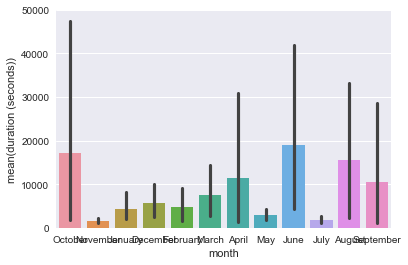

In [29]:
sns.barplot(UFO['month'], UFO['duration (seconds)'])

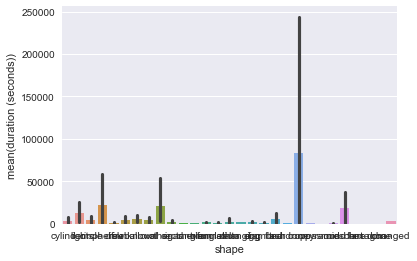

In [30]:
sns.barplot(UFO['shape'], UFO['duration (seconds)'])

I also completed two heat maps. The first displays the frequency of UFO sightings based on the day of the month. July 4th has a very high frequency, likely because fireworks are commonly used on this day in the United States. UFO sightings seem to happen more frequently at the beginning and middle of the month. 

The second heat map shows the frequency of UFO sightings by state and shape. Light continues to dominate and states like California and New York have a much greater frequency than others. Likely due to greater population levels. 

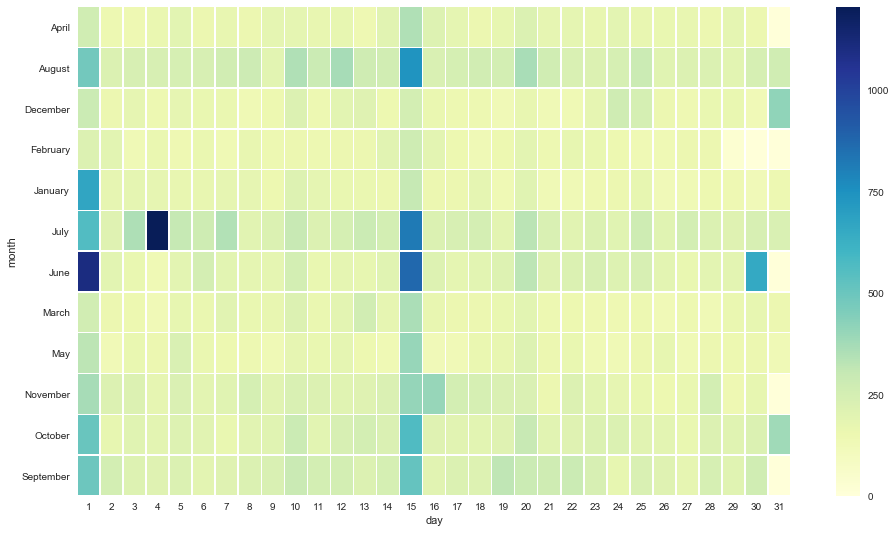

In [31]:
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(UFO_h, linewidth=.5, ax=ax, cmap = "YlGnBu")

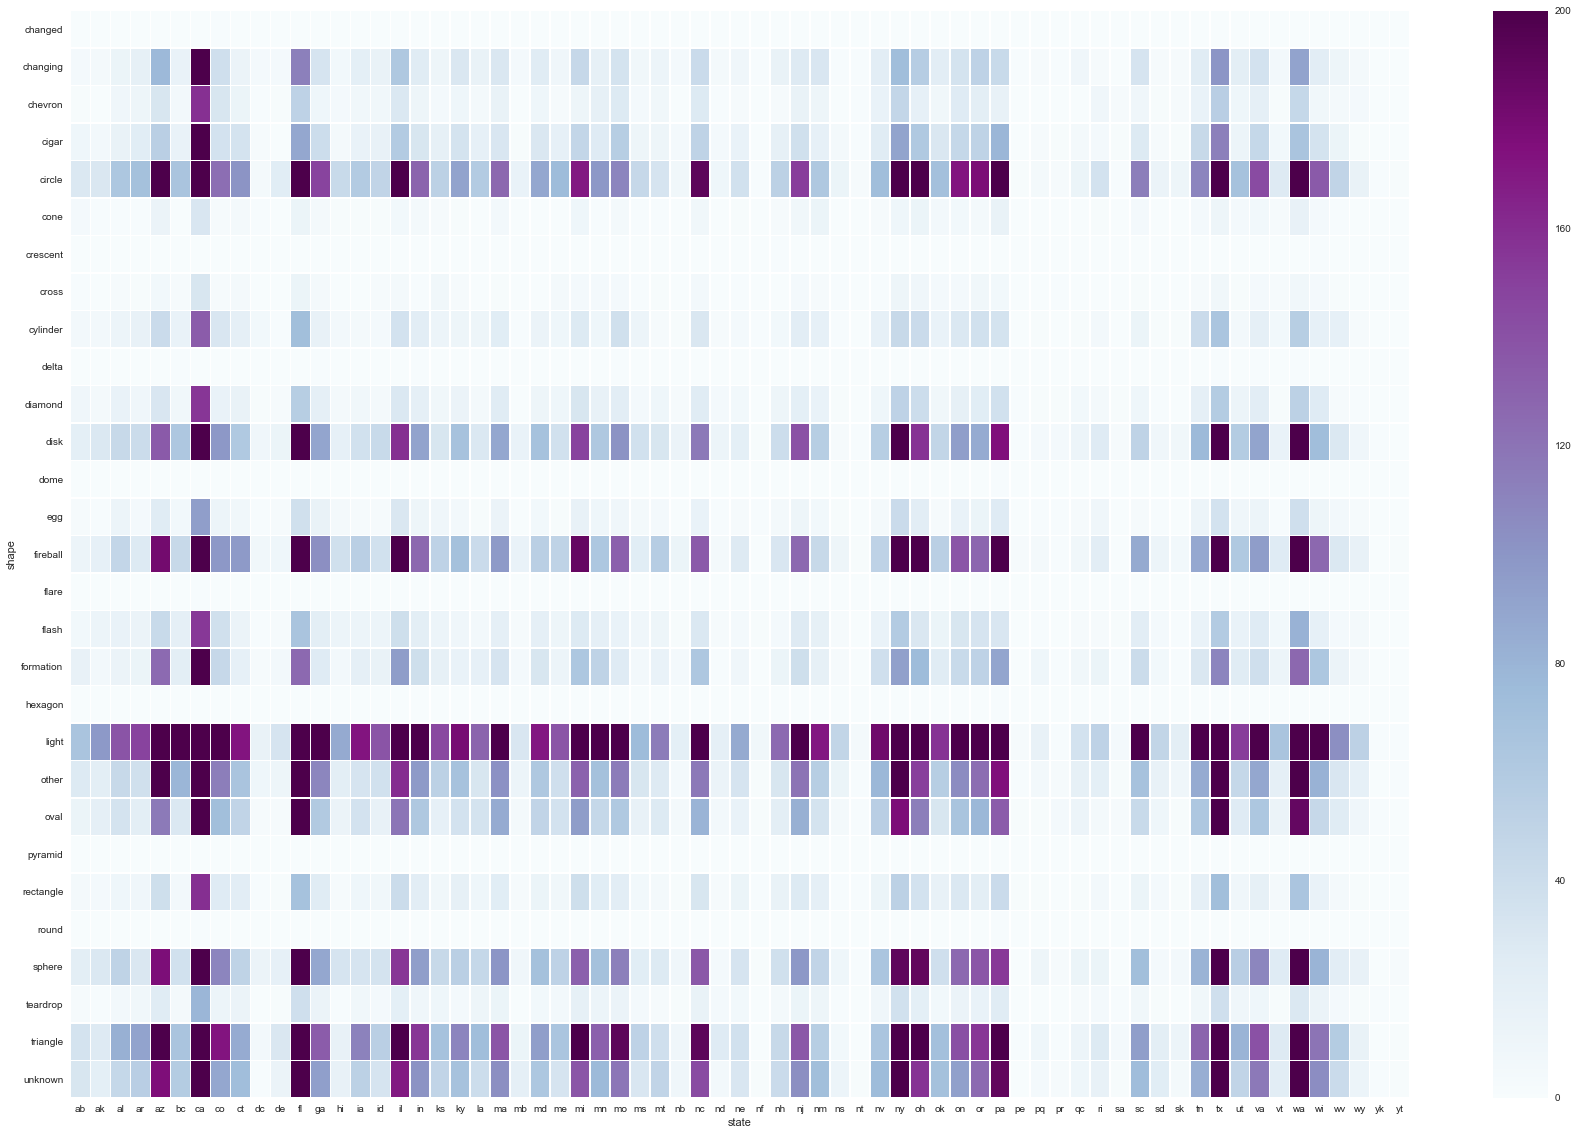

In [32]:
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(UFO_s, linewidth=.5, ax=ax, cmap = "BuPu", vmax=200)

## JSON

For my Jason I got data from tripadvisor's ratings of all the museums in the United States. These are rated on a scale from 0-4. After loading the JSON, I checked for any null values. As for outliers, the only possible outlier are museums who have more ratings because they are more popular. I chose to keep any outliers in the data as removing them would remove a large portion of what I have. I also changed the format to a dataframe and removed all of the commas in the data so that they could be read as a float instead of a string. 


In [33]:
get_request = requests.get("https://storage.googleapis.com/kaggle-datasets/182/386/traveler_rating_USonly.json?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1517597381&Signature=b1AyLay4b9ndIXg9NI0t9eGqMYNv5qVdBeoA3TDOMR2VTVvwUT7VZjWxyTouFLL2ayThjUv2IoYeiTeyrjukl6gyyzZpQYOpP3GcndLnsWYJ4qf1jJPQ5LU2HtjTDE8G8VjJDYG1PrvXWB10%2FKOsajh0OXSIWNiEp3eBTwXb6tqizQL3xppbTuTGkD4f8EevEIDUPqolLiDfTqpaYHtc1meWurd6lEofsx29HLXMTGgw09zvJy9faSVDVi5ypieGUhi1kRHNq7iB292pl8e%2BWeGOcZ4k8dfmxZmvPvDBRBPCgNdjZb2h8zIxQoVFPhBLYGzFZEG8BMYvF8%2BZKgZhwA%3D%3D")

In [34]:
museum_dict = json.loads(get_request.text)

In [35]:
museum_dict.keys()

dict_keys(['Gettysburg Heritage Center', 'Hudson River Museum', 'The Aurora Ice Museum', 'Chrysler Museum of Art', 'Pink Palace Museum', 'Gettysburg Seminary Ridge Museum', 'Oklahoma Railway Museum', 'Ships of the Sea Maritime Museum', 'LBJ Presidential Library', 'Museum Mile', 'High Museum of Art', 'Virginia Living Museum', 'Computer History Museum', 'Georgia State Railroad Museum', 'University of Michigan Museum of Natural History', 'Mutter Museum', 'Independence Seaport Museum', 'Fort East Martello Museum', 'The Delta Blues Museum', 'Pensacola Naval Air Station', 'The Metropolitan Museum of Art', 'The Andy Griffith Museum', 'Science Museum of Minnesota', 'Living Computer Museum', 'Fairhope Museum', 'The California Route 66 Museum', 'Mount Dora Museum Of Speed', 'Frazier History Museum', 'Pueblo Grande Museum', "Golisano Children's Museum of Naples", 'The Mob Museum', 'Skagway Museum and Archives', '45th Infantry Division Museum', 'Museum of Russian Icons', "Madison Children's Museum

In [36]:
museum = pd.read_json("https://storage.googleapis.com/kaggle-datasets/182/386/traveler_rating_USonly.json?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1517597381&Signature=b1AyLay4b9ndIXg9NI0t9eGqMYNv5qVdBeoA3TDOMR2VTVvwUT7VZjWxyTouFLL2ayThjUv2IoYeiTeyrjukl6gyyzZpQYOpP3GcndLnsWYJ4qf1jJPQ5LU2HtjTDE8G8VjJDYG1PrvXWB10%2FKOsajh0OXSIWNiEp3eBTwXb6tqizQL3xppbTuTGkD4f8EevEIDUPqolLiDfTqpaYHtc1meWurd6lEofsx29HLXMTGgw09zvJy9faSVDVi5ypieGUhi1kRHNq7iB292pl8e%2BWeGOcZ4k8dfmxZmvPvDBRBPCgNdjZb2h8zIxQoVFPhBLYGzFZEG8BMYvF8%2BZKgZhwA%3D%3D")

In [37]:
museum.isnull().sum()

1940 Air Terminal Museum                                     0
21c Museum Hotel                                             0
45th Infantry Division Museum                                0
911 Ground Zero Tour                                         0
Abbe Museum                                                  0
Abby Aldrich Rockefeller Folk Art Museum                     0
Abraham Lincoln Presidential Library and Museum              0
Ackland Art Museum                                           0
Adams Museum                                                 0
Adirondack Museum                                            0
Admiral Nimitz State Historic Site                           0
Ah-Tah-Thi-Ki Museum                                         0
Air Force Armament Museum                                    0
Air Mobility Command Museum                                  0
Airborne and Special Operations Museum                       0
Akta Lakota Museum                                     

In [38]:
museum_df = pd.DataFrame(museum)

In [39]:
museum_df = museum_df.replace( '[\$,)]','', regex=True )

### Descriptive Statistics
I found the mean, max, and minimum number of reviews for each museum. I also summed up the number of reviews for each museaum. 

In [40]:
museum.describe()

,1940 Air Terminal Museum,21c Museum Hotel,45th Infantry Division Museum,Abbe Museum,Abby Aldrich Rockefeller Folk Art Museum,Ackland Art Museum,Adams Museum,Adirondack Museum,Admiral Nimitz State Historic Site,Ah-Tah-Thi-Ki Museum,...,World's Largest Toy Museum,Wrangell Museum,Wright Museum of WWII,Wyoming State Museum,Yale Peabody Museum of Natural History,Yale University Art Gallery,Zippo / Case Museum,Zwaanendael Museum,aSHEville Museum,de Young Museum
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,20.400000,35.400000,41.400000,44.200000,92.000000,18.000000,78.200000,56.600000,64.200000,18.000000,...,81.400000,16.800000,34.400000,50.600000,71.000000,108.000000,41.60000,20.600000,18.400000,244.000000
std,25.783716,47.384597,64.021871,41.130281,147.966212,20.408332,93.630657,103.818592,103.453854,23.119256,...,79.431102,24.488773,63.034118,63.657678,95.013157,205.814237,63.25583,18.915602,23.712866,309.257983
min,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.00000,0.000000,0.000000,22.000000
25%,3.000000,1.000000,0.000000,9.000000,2.000000,2.000000,6.000000,1.000000,1.000000,3.000000,...,19.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.00000,3.000000,2.000000,28.000000
50%,5.000000,11.000000,8.000000,33.000000,18.000000,7.000000,30.000000,3.000000,12.000000,6.000000,...,63.000000,1.000000,3.000000,17.000000,19.000000,7.000000,7.00000,22.000000,8.000000,86.000000
75%,35.000000,55.000000,49.000000,73.000000,92.000000,36.000000,145.000000,39.000000,65.000000,24.000000,...,120.000000,28.000000,22.000000,86.000000,112.000000,55.000000,52.00000,36.000000,25.000000,337.000000
max,59.000000,110.000000,150.000000,100.000000,348.000000,44.000000,209.000000,240.000000,243.000000,56.000000,...,199.000000,55.000000,146.000000,146.000000,220.000000,474.000000,148.00000,42.000000,57.000000,747.000000


In [41]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 1007 entries, 1940 Air Terminal Museum to de Young Museum
dtypes: int64(881), object(126)
memory usage: 39.4+ KB


In [42]:
np.sum(museum)

1940 Air Terminal Museum                                                     102
21c Museum Hotel                                                             177
45th Infantry Division Museum                                                207
911 Ground Zero Tour                                              2,232217311310
Abbe Museum                                                                  221
Abby Aldrich Rockefeller Folk Art Museum                                     460
Abraham Lincoln Presidential Library and Museum                   2,644260671314
Ackland Art Museum                                                            90
Adams Museum                                                                 391
Adirondack Museum                                                            283
Admiral Nimitz State Historic Site                                           321
Ah-Tah-Thi-Ki Museum                                                          90
Air Force Armament Museum   

### Data Visualization
    I created a plot where each line represents each museum. This shows the number of reviews each museum recieved at each rating point (0-4). From the graph we see that the fast majority of reviews are a zero with fewer and fewer as the rating increases. 

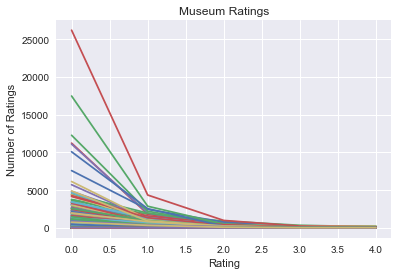

In [48]:
plt.plot(museum_df)
plt.ylabel('Number of Ratings')
plt.xlabel('Rating')
plt.title('Museum Ratings')